In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Load dataset

In [4]:
fileName = 'complete_dataset.csv'
demand_dataset = pd.read_csv(fileName)

Data preprocessing - change school_day and holiday into binary variable

In [5]:

demand_dataset['school_day'] = demand_dataset['school_day'].replace({'Y':1, 'N':0})
demand_dataset['holiday'] = demand_dataset['holiday'].replace({'Y':1, 'N':0})
demand_dataset[25:30]


date      demand        RRP  demand_pos_RRP  RRP_positive  \
25  2015-01-26  103769.480  16.936013      103769.480     16.936013   
26  2015-01-27  118393.310  21.206289      118393.310     21.206289   
27  2015-01-28  116763.725  17.023838      116763.725     17.023838   
28  2015-01-29  119313.730  19.624827      119313.730     19.624827   
29  2015-01-30  121018.150  21.029356      121018.150     21.029356   

    demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
25             0.0           0.0              0.0             11.6   
26             0.0           0.0              0.0             11.7   
27             0.0           0.0              0.0             13.3   
28             0.0           0.0              0.0             12.8   
29             0.0           0.0              0.0             13.1   

    max_temperature  solar_exposure  rainfall  school_day  holiday  
25             19.8            19.9       1.0           0        1  
26             19.1            17.7       0.6           0        0  
27             25.4            27.0       0.0           0        0  
28             22.2            28.9       0.0           1        0  
29             21.0            27.6       0.0           1        0

Fill missing values

In [6]:
df = demand_dataset.drop(['date'], axis=1)
df.at[161, 'rainfall'] = 0
df.at[1377, 'rainfall'] = 0.4
df.at[1378, 'rainfall'] = 3.4
df['solar_exposure'].fillna(method = 'ffill', inplace = True)
print(df.isnull().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


C:\Users\AB\AppData\Local\Temp\ipykernel_3584\3896398393.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['solar_exposure'].fillna(method = 'ffill', inplace = True)


Scatter plot of relationships between chosen variables

c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

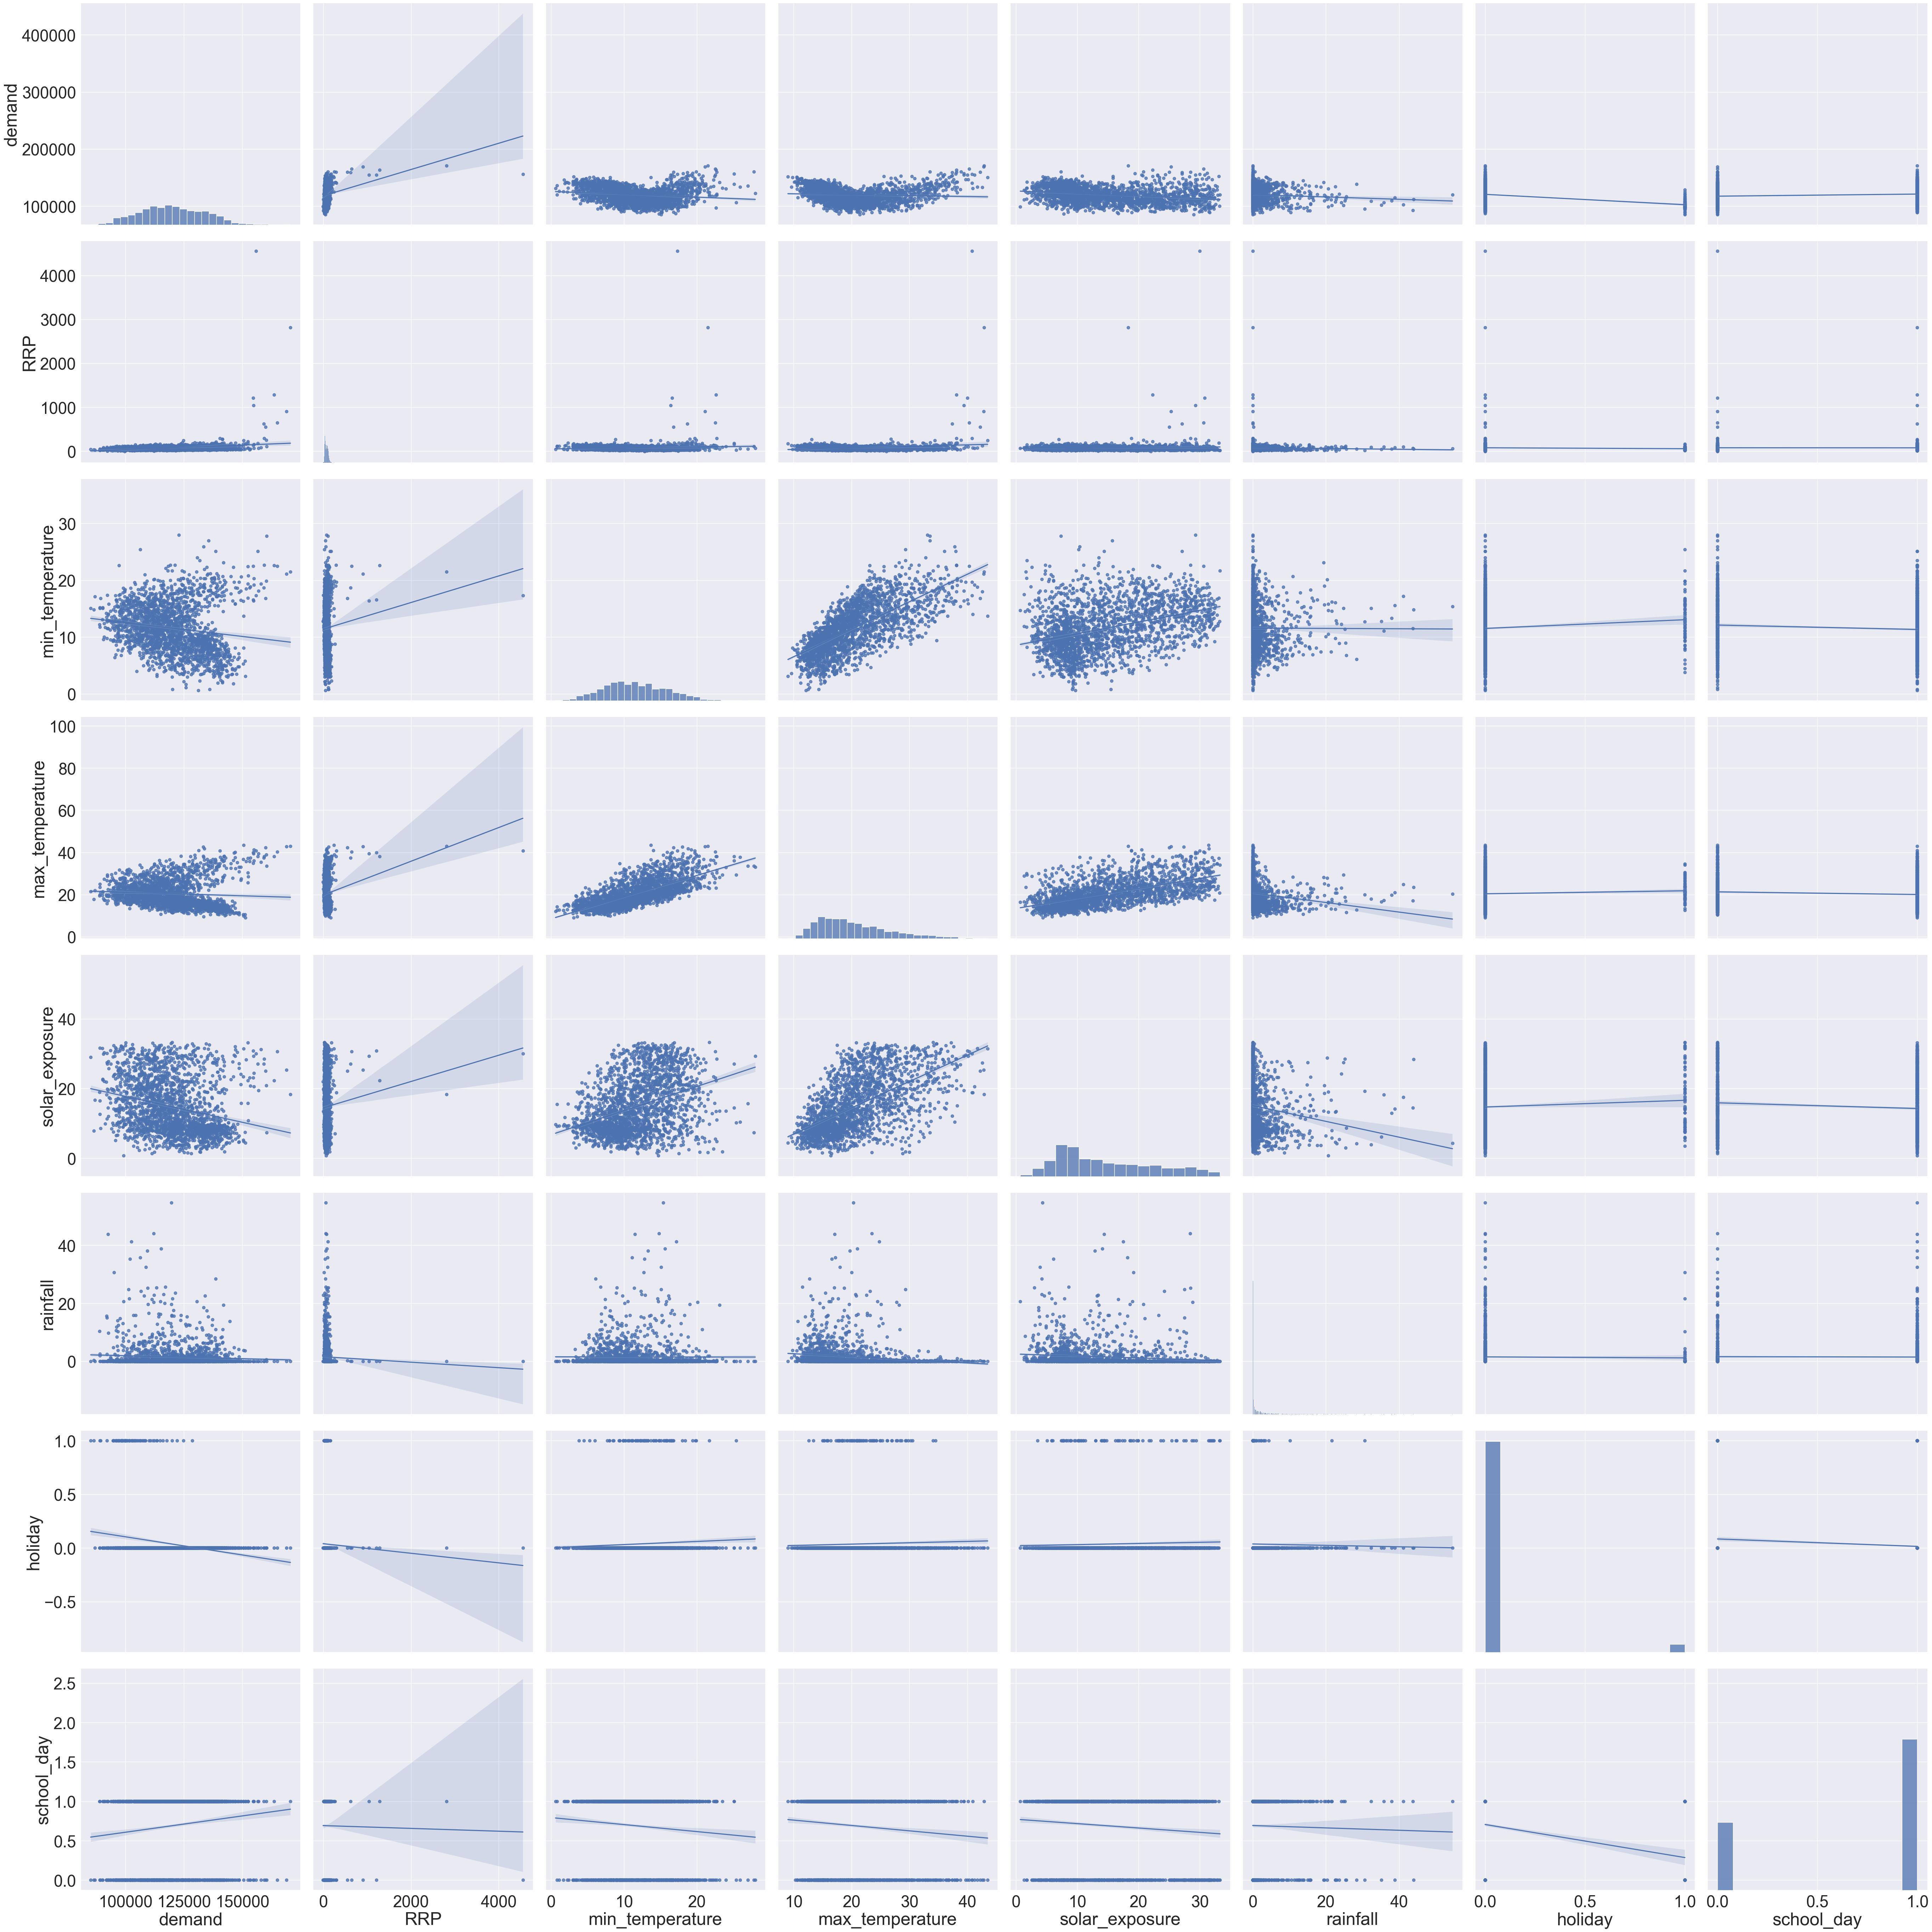

In [7]:
plot_df = df[['demand',
                'RRP',
                'min_temperature',
                'max_temperature',
                'solar_exposure',
                'rainfall',
                'holiday',
                'school_day']]
sns.set(font_scale=3)
sns.pairplot(plot_df, kind='reg', height=7)


Scale the data into standard deviation

In [8]:
scaled_df=MinMaxScaler().fit_transform(df[['demand',
                                            'RRP',
                                            'min_temperature',
                                            'max_temperature',
                                            'solar_exposure',
                                            'rainfall']])
scaled_df=pd.DataFrame(scaled_df, columns=['demand',
                                           'RRP',
                                            'min_temperature',
                                            'max_temperature',
                                            'solar_exposure',
                                            'rainfall'])
scaled_df['holiday'] = df['holiday']
scaled_df['school_day'] = df['school_day']
scaled_df[1491:1500]

demand       RRP  min_temperature  max_temperature  solar_exposure  \
1491  0.294331  0.024935         0.605839         0.362319        0.831288   
1492  0.225906  0.027166         0.437956         0.440580        0.861963   
1493  0.463475  0.054224         0.525547         0.736232        0.822086   
1494  0.563272  0.042363         0.675182         0.846377        0.779141   
1495  0.398256  0.025512         0.708029         0.397101        0.263804   
1496  0.404487  0.021682         0.624088         0.518841        0.426380   
1497  0.647543  0.032823         0.653285         0.744928        0.677914   
1498  0.660350  0.033752         0.733577         0.559420        0.748466   
1499  0.376734  0.025007         0.638686         0.408696        0.625767   

      rainfall  holiday  school_day  
1491  0.120879        0           1  
1492  0.000000        0           1  
1493  0.000000        0           1  
1494  0.000000        0           1  
1495  0.000000        0           1  
1496  0.000000        0           1  
1497  0.000000        0           1  
1498  0.201465        0           1  
1499  0.000000        0           1

Create function to convert the dataframe into the Train and Test set

In [11]:
def convert_to_X_y(dataframe, window, forecasting_time):
    dataframe = dataframe.to_numpy()
    X = []
    y = []
    for i in range (window, len(dataframe) - forecasting_time + 1):
        X.append(dataframe[i - window:i, 0: dataframe.shape[1]])
        y.append(dataframe[i+forecasting_time - 1: i+ forecasting_time, 0])
    return np.array(X), np.array(y)

Convert the dataframe

In [12]:
window_size = 7
forecasting_time = 1
X, y = convert_to_X_y(scaled_df, window_size, forecasting_time)
X.shape, y.shape

((2099, 7, 8), (2099, 1))

Train test split

In [13]:
X_train, y_train = X[:1461], y[:1461]
X_test, y_test = X[1461:2099], y[1461:2099]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1461, 7, 8), (1461, 1), (638, 7, 8), (638, 1))

In [14]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
 
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences= True))
lstm_model.add(LSTM(32, activation='relu', return_sequences=False))
lstm_model.add(Dense(y.shape[1], activation = 'linear'))

lstm_model.summary()
cp = ModelCheckpoint('lstm_model/', save_best_only=True)
lstm_model.compile(loss = 'mse',
                    optimizer=Adam(learning_rate=0.001),
                    metrics = [RootMeanSquaredError()])
lstm_model.fit(X_train, y_train, epochs=50, batch_size= 10, validation_data=(X_test, y_test), verbose= 1, callbacks = [cp])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             18688     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31137 (121.63 KB)
Trainable params: 31137 (121.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


133/147 [==========================>...] - ETA: 0s - loss: 0.0384 - root_mean_squared_error: 0.1961INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 3s 12ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1446
Epoch 2/50
127/147 [========================>.....] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1365INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1343
Epoch 3/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0177 - root_mean_squared_error: 0.1331 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 4/50
127/147 [========================>.....] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1284INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0167 - root_mean_squared_error: 0.1291 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 5/50
134/147 [==========================>...] - ETA: 0s - loss: 0.0156 - root_mean_squared_error: 0.1249INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 2s 10ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297
Epoch 6/50
124/147 [========================>.....] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.1225INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0149 - root_mean_squared_error: 0.1219 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1278
Epoch 7/50
125/147 [========================>.....] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1188INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1265
Epoch 8/50
130/147 [=========================>....] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1149INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 2s 10ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 9/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 10/50
127/147 [========================>.....] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1037INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1179
Epoch 11/50
129/147 [=========================>....] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0999INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0100 - root_mean_squared_error: 0.0997 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 12/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 13/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0086 - root_mean_squared_error: 0.0929 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1110
Epoch 14/50
129/147 [=========================>....] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0920INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 2s 10ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 15/50
125/147 [========================>.....] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0903INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0081 - root_mean_squared_error: 0.0899 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014
Epoch 16/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 17/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0080 - root_mean_squared_error: 0.0895 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1071
Epoch 18/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0077 - root_mean_squared_error: 0.0877 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045
Epoch 19/50
129/147 [=========================>....] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0889INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0079 - root_mean_squared_error: 0.0886 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 20/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 21/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0072 - root_mean_squared_error: 0.0847 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 22/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 23/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 24/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0122 - val_root_m

INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 26/50
147/147 [==============================] - 0s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 27/50
125/147 [========================>.....] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0808INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0064 - root_mean_squared_error: 0.0803 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 28/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020
Epoch 29/50
128/147 [=========================>....] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0808INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 30/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 31/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 32/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0801 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 33/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 34/50
123/147 [========================>.....] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0789INFO:tensorflow:Assets written to: l

INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 2s 10ms/step - loss: 0.0061 - root_mean_squared_error: 0.0779 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 35/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 36/50
147/147 [==============================] - 0s 3ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0976
Epoch 37/50
147/147 [==============================] - 0s 3ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 38/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0993
Epoch 39/50
125/147 [========================>.....] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0770INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 10ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0956
Epoch 40/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 41/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 42/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 43/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 44/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0096 - val_root_

INFO:tensorflow:Assets written to: lstm_model\assets


147/147 [==============================] - 1s 9ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0950
Epoch 49/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0979
Epoch 50/50
147/147 [==============================] - 0s 2ms/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001


In [15]:
from keras.models import load_model
best_LSTM = load_model('lstm_model/')

20/20 [==============================] - 0s 1ms/step


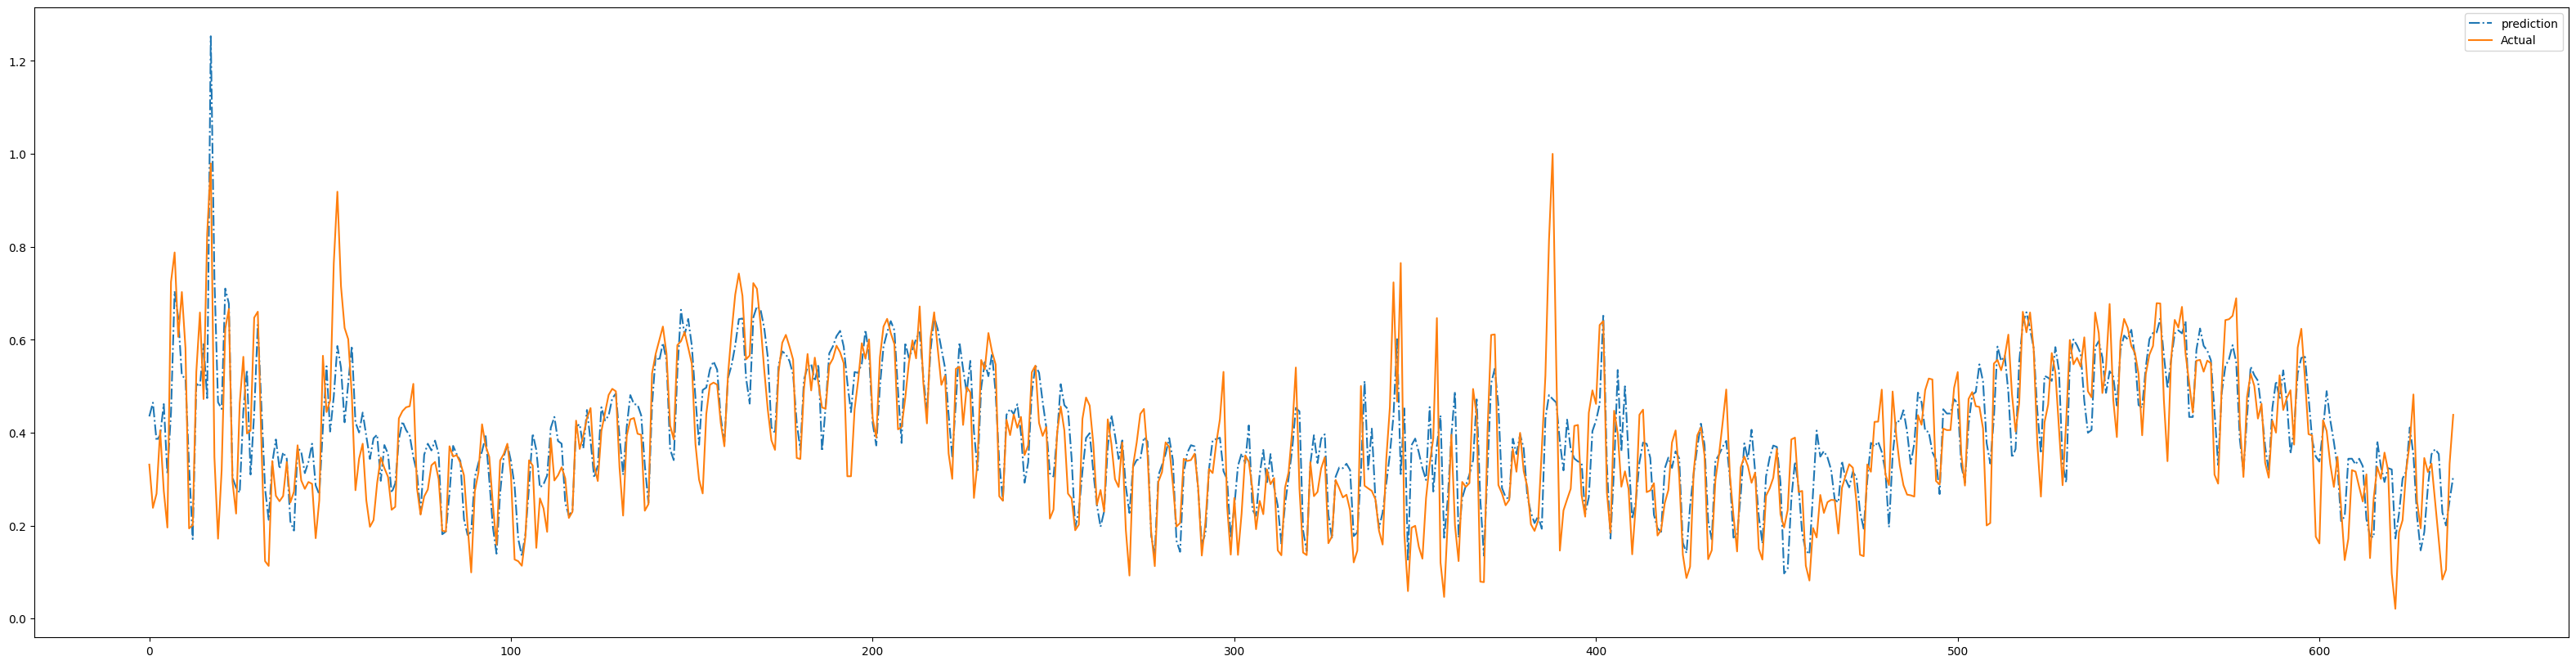

Mean_squared_error: 0.009023643569376051
Mean_absolute_error: 0.06930545692234166
Root mean squared error: 0.09499286062318606


In [16]:
test_prediction = best_LSTM.predict(X_test)
# train_results = pd.DataFrame(data={'Train_prediction': train_prediction, 'Actual result': y_train})
# train_results
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(test_prediction, linestyle = 'dashdot', label ='prediction')
plt.plot(y_test, label ='Actual')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean_squared_error:', mean_squared_error(y_test, test_prediction))
print('Mean_absolute_error:', mean_absolute_error(y_test, test_prediction))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, test_prediction)))

### Random Forest

In [9]:
train = scaled_df.loc[scaled_df.index < 1461]
test = scaled_df.loc[scaled_df.index >= 1461]
print(train)
print(test)
x_train = train.drop(labels='demand', axis=1)
y_train = train['demand']
x_test = test.drop(labels='demand', axis=1)
y_test = test['demand']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

        demand       RRP  min_temperature  max_temperature  solar_exposure  \
0     0.169948  0.006960         0.463504         0.518841        0.702454   
1     0.520242  0.008608         0.540146         0.863768        0.800613   
2     0.668613  0.008921         0.708029         0.846377        0.791411   
3     0.224830  0.006823         0.572993         0.359420        0.751534   
4     0.386139  0.007200         0.525547         0.376812        0.920245   
...        ...       ...              ...              ...             ...   
1456  0.521915  0.023791         0.569343         0.823188        0.877301   
1457  0.569627  0.027995         0.777372         0.794203        0.564417   
1458  0.271107  0.021467         0.744526         0.431884        0.153374   
1459  0.169701  0.019809         0.642336         0.397101        0.282209   
1460  0.213741  0.019969         0.609489         0.420290        0.938650   

      rainfall  holiday  school_day  
0     0.000000        1  

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor(n_jobs=-1)
param_grid = {
    "n_estimators": np.arange(100, 1500, 100),
    "max_depth": np.arange(6, 20, 1),
    "max_leaf_nodes": np.arange(12, 20, 1),
#    'max_features': ['sqrt', 'log2', None],
}

rdms = RandomizedSearchCV(rf_model, param_grid, scoring='neg_mean_absolute_error', verbose = 2, cv=10)
rdms.fit(x_train, y_train)
print(rdms.best_score_)
print(rdms.best_params_)
print(rdms.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.1s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=15, max_leaf_nodes=16, n_estimators=200; total time=   0.0s
[CV] END ..max_depth=7, max_leaf_nodes=13, n_estimators=1100; total time=   0.6s
[CV] END ..max_depth=7, max_leaf_nodes=13, n_e

In [19]:
# {'n_estimators': 1100, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 11}
# {'n_estimators': 400, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 19}
# {'n_estimators': 500, 'max_leaf_nodes': 18, 'max_features': None, 'max_depth': 6}
# {'n_estimators': 700, 'max_leaf_nodes': 12, 'max_features': None, 'max_depth': 15}
# {'n_estimators': 100, 'max_leaf_nodes': 17, 'max_features': None, 'max_depth': 6}
# {'n_estimators': 800, 'max_leaf_nodes': 19, 'max_depth': 11}
# {'n_estimators': 1000, 'max_leaf_nodes': 19, 'max_depth': 8}
# {'n_estimators': 700, 'max_leaf_nodes': 18, 'max_depth': 7}
# -0.008783526035931919
# {'n_estimators': 300, 'max_leaf_nodes': 19, 'max_depth': 14}
# -0.008521678999174397
# {'n_estimators': 600, 'max_leaf_nodes': 16, 'max_depth': 9}
# -0.009946187741837993
# {'n_estimators': 300, 'max_leaf_nodes': 17, 'max_depth': 14}
# -0.009344037853001887
# {'n_estimators': 1200, 'max_leaf_nodes': 19, 'max_depth': 19}
# -0.008496487012060117
# {'n_estimators': 800, 'max_leaf_nodes': 18, 'max_depth': 11}
# -0.008878021055771953
# {'n_estimators': 600, 'max_leaf_nodes': 16, 'max_depth': 6}
# -0.009957689230692074
# {'n_estimators': 1000, 'max_leaf_nodes': 19, 'max_depth': 9}
# -0.008515829481855386
# {'n_estimators': 1000, 'max_leaf_nodes': 19, 'max_depth': 8}
# -0.008494167941168432

In [11]:
tune_result = "\n Best Hyper Parameters: ", rdms.best_params_,"\n", "Best estimator: ", rdms.best_estimator_,"\n"
print (tune_result)

##('\n Best Hyper Parameters: ', {'n_estimators': 1000, 'max_leaf_nodes': 19, 'max_depth': 8}, '\n', 'Best estimator: ', RandomForestRegressor(max_depth=8, max_leaf_nodes=19, n_estimators=1000,
##                      n_jobs=-1), '\n')

('\n Best Hyper Parameters: ', {'n_estimators': 900, 'max_leaf_nodes': 18, 'max_depth': 8}, '\n', 'Best estimator: ', RandomForestRegressor(max_depth=8, max_leaf_nodes=18, n_estimators=900,
                      n_jobs=-1), '\n')


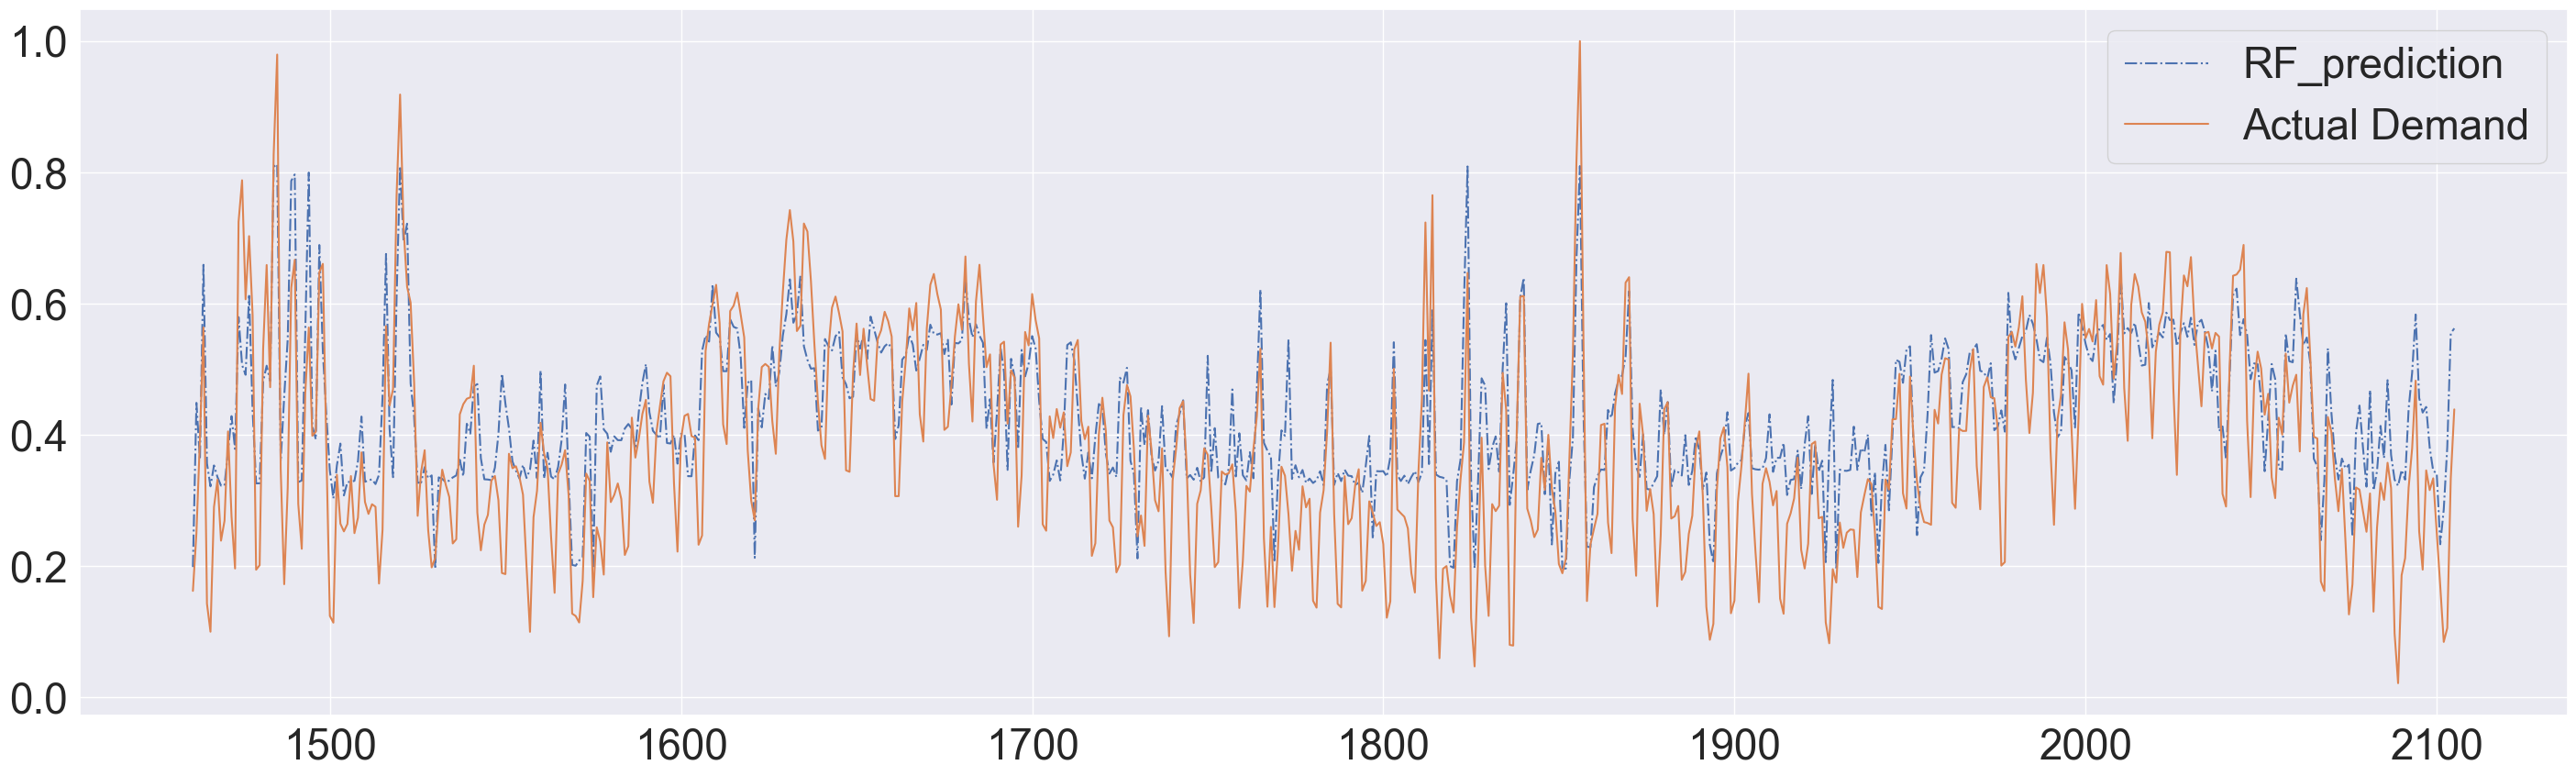

Mean_squared_error: 0.012473395239846844
Mean_absolute_error: 0.08813071018768279
Root mean squared error: 0.11168435539432926


(1461    0.198096
 1462    0.448456
 1463    0.362047
 1464    0.658910
 1465    0.356140
           ...   
 2101    0.232833
 2102    0.285806
 2103    0.380694
 2104    0.554480
 2105    0.561944
 Length: 645, dtype: float64,
 1461    0.161743
 1462    0.249841
 1463    0.393822
 1464    0.563282
 1465    0.142222
           ...   
 2101    0.169373
 2102    0.083949
 2103    0.105040
 2104    0.333285
 2105    0.438446
 Name: demand, Length: 645, dtype: float64)

In [18]:
rf_tuned = rdms.best_estimator_
rf_tuned_pred = rf_tuned.predict(x_test)
rf_tuned_pred = pd.Series(rf_tuned_pred, index=y_test.index)
plt.rcParams["figure.figsize"] = (35,10)
plt.plot(rf_tuned_pred ,label = "RF_prediction", linestyle = 'dashdot')
plt.plot(y_test, label = 'Actual Demand')#, linestyle = 'dashdot')
plt.legend(loc = 'upper right')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean_squared_error:', mean_squared_error(y_test, rf_tuned_pred))
print('Mean_absolute_error:', mean_absolute_error(y_test, rf_tuned_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, rf_tuned_pred)))
rf_tuned_pred, y_test

In [22]:
rf_tuned_pred

array([0.19546664, 0.44497661, 0.36713815, 0.66203934, 0.3516491 ,
       0.31317776, 0.35471799, 0.34568073, 0.3137192 , 0.31214973,
       0.38181475, 0.43005162, 0.38795159, 0.5906294 , 0.5089033 ,
       0.48806011, 0.62582314, 0.43684333, 0.33147957, 0.32091192,
       0.47869583, 0.50862948, 0.47872558, 0.80379048, 0.80735576,
       0.33810662, 0.45238523, 0.53754528, 0.78354911, 0.79544033,
       0.31678918, 0.32476614, 0.55214189, 0.7971127 , 0.42210547,
       0.38633315, 0.69278865, 0.51536077, 0.41830739, 0.34857925,
       0.29662193, 0.35540178, 0.38341374, 0.2972348 , 0.32298881,
       0.32557705, 0.33078777, 0.36432314, 0.41371241, 0.31913883,
       0.32724003, 0.33074497, 0.31704198, 0.34152371, 0.45629983,
       0.6730738 , 0.3969248 , 0.33061663, 0.60066222, 0.80435004,
       0.68972483, 0.71640985, 0.48044306, 0.41214588, 0.31492906,
       0.32123536, 0.35148736, 0.32830224, 0.3364751 , 0.19515934,
       0.3327078 , 0.33200192, 0.31915645, 0.32797893, 0.32642

In [23]:
y_test

1461    0.161743
1462    0.249841
1463    0.393822
1464    0.563282
1465    0.142222
          ...   
2101    0.169373
2102    0.083949
2103    0.105040
2104    0.333285
2105    0.438446
Name: demand, Length: 645, dtype: float64

In [24]:
x_test

RRP  min_temperature  max_temperature  solar_exposure  rainfall  \
1461  0.018578         0.543796         0.498551        0.950920  0.000000   
1462  0.021572         0.649635         0.382609        0.785276  0.000000   
1463  0.029294         0.558394         0.594203        0.825153  0.000000   
1464  0.027898         0.635036         0.973913        0.819018  0.000000   
1465  0.019661         0.613139         0.353623        0.374233  0.007326   
...        ...              ...              ...             ...       ...   
2101  0.000000         0.445255         0.492754        0.653374  0.000000   
2102  0.000898         0.613139         0.591304        0.585890  0.000000   
2103  0.006823         0.470803         0.594203        0.236196  0.000000   
2104  0.009404         0.310219         0.107246        0.202454  0.234432   
2105  0.017966         0.302920         0.104348        0.156442  0.018315   

      holiday  school_day  
1461        1           0  
1462        0           0  
1463        0           0  
1464        0           0  
1465        0           0  
...       ...         ...  
2101        0           0  
2102        0           0  
2103        0           0  
2104        0           0  
2105        0           0  

[645 rows x 7 columns]

### SARIMA

In [25]:
fileName = 'complete_dataset.csv'
df = pd.read_csv(fileName, index_col='date', parse_dates=True).asfreq("D")
df.head()

demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-01-01   99635.030  25.633696       97319.240     26.415953   
2015-01-02  129606.010  33.138988      121082.015     38.837661   
2015-01-03  142300.540  34.564855      142300.540     34.564855   
2015-01-04  104330.715  25.005560      104330.715     25.005560   
2015-01-05  118132.200  26.724176      118132.200     26.724176   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-01-01        2315.790     -7.240000         0.020833             13.3   
2015-01-02        8523.995    -47.809777         0.062500             15.4   
2015-01-03           0.000      0.000000         0.000000             20.0   
2015-01-04           0.000      0.000000         0.000000             16.3   
2015-01-05           0.000      0.000000         0.000000             15.0   

            max_temperature  solar_exposure  rainfall school_day holiday  
date                                                                      
2015-01-01             26.9            23.6       0.0          N       Y  
2015-01-02             38.8            26.8       0.0          N       N  
2015-01-03             38.2            26.5       0.0          N       N  
2015-01-04             21.4            25.2       4.2          N       N  
2015-01-05             22.0            30.7       0.0          N       N

<Axes: xlabel='date'>

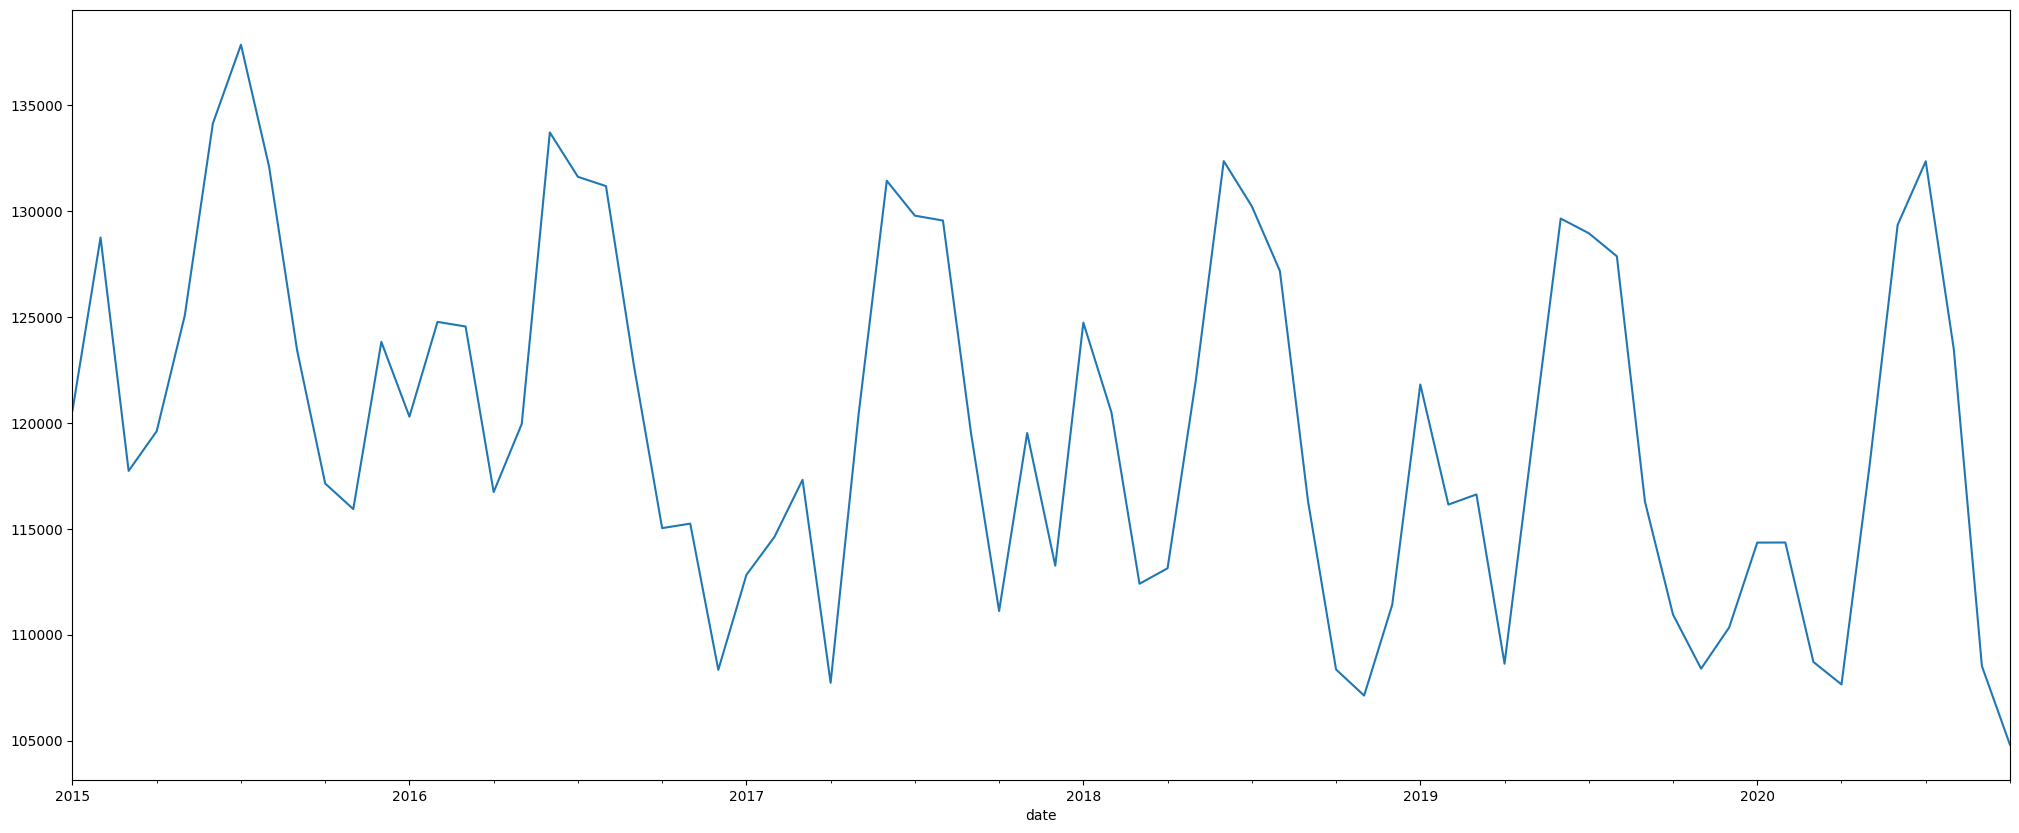

In [26]:
monthly_df = df['demand'].resample('M').mean()
monthly_df.plot()

In [27]:
monthly_df.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [28]:
train = monthly_df.loc[monthly_df.index.get_level_values(0) <= '2018-12-31']
test = monthly_df[monthly_df.index.get_level_values(0) >= '2019-01-31']
train, test

(date
 2015-01-31    120576.860323
 2015-02-28    128754.107679
 2015-03-31    117730.704839
 2015-04-30    119606.603500
 2015-05-31    125072.101935
 2015-06-30    134137.917833
 2015-07-31    137856.058387
 2015-08-31    132113.753387
 2015-09-30    123427.208000
 2015-10-31    117135.675161
 2015-11-30    115927.911333
 2015-12-31    123824.128871
 2016-01-31    120292.740806
 2016-02-29    124767.840000
 2016-03-31    124549.920000
 2016-04-30    116731.018500
 2016-05-31    119950.549677
 2016-06-30    133713.506667
 2016-07-31    131618.328387
 2016-08-31    131178.282581
 2016-09-30    122656.683167
 2016-10-31    115029.608387
 2016-11-30    115241.024167
 2016-12-31    108336.597581
 2017-01-31    112818.727097
 2017-02-28    114614.890357
 2017-03-31    117311.886129
 2017-04-30    107725.249333
 2017-05-31    120448.647903
 2017-06-30    131431.604667
 2017-07-31    129783.944839
 2017-08-31    129554.926290
 2017-09-30    119511.055000
 2017-10-31    111114.919839
 2017-11

In [30]:
from pmdarima import auto_arima
search_fit = auto_arima(train,
                        trace=True,
                        m=12,
                        n_jobs=-1,
                        frequency = 30,
                        error_action='ignore')
search_fit.summary()

c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=731.452, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=724.257, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=726.506, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=726.612, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=726.870, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=725.800, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=725.806, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=727.792, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=726.346, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=725.514, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=728.164, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.887 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -360.129
Date:                  Tue, 26 Sep 2023   AIC                            724.257
Time:                          01:54:41   BIC                            727.424
Sample:                      01-31-2015   HQIC                           725.363
                           - 12-31-2018                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1957.6819    891.513     -2.196      0.028   -3705.015    -210.349
sigma2      2.861e+07   5.83e+06      4.909      0.000    1.72e+07       4e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.93   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.03   Prob(JB):                         0.71
Heteroskedasticity (H):               1.50   Skew:                            -0.02
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# model_sarima = SARIMAX(train['demand'], order())
predictions = pd.Series(search_fit.predict(len(test)))
predictions.index = test.index
predictions[-5:]

date
2020-06-30    128445.449089
2020-07-31    126314.362062
2020-08-31    123254.143836
2020-09-30    112400.240422
2020-10-31    104438.172546
Freq: M, dtype: float64

<Axes: xlabel='date'>

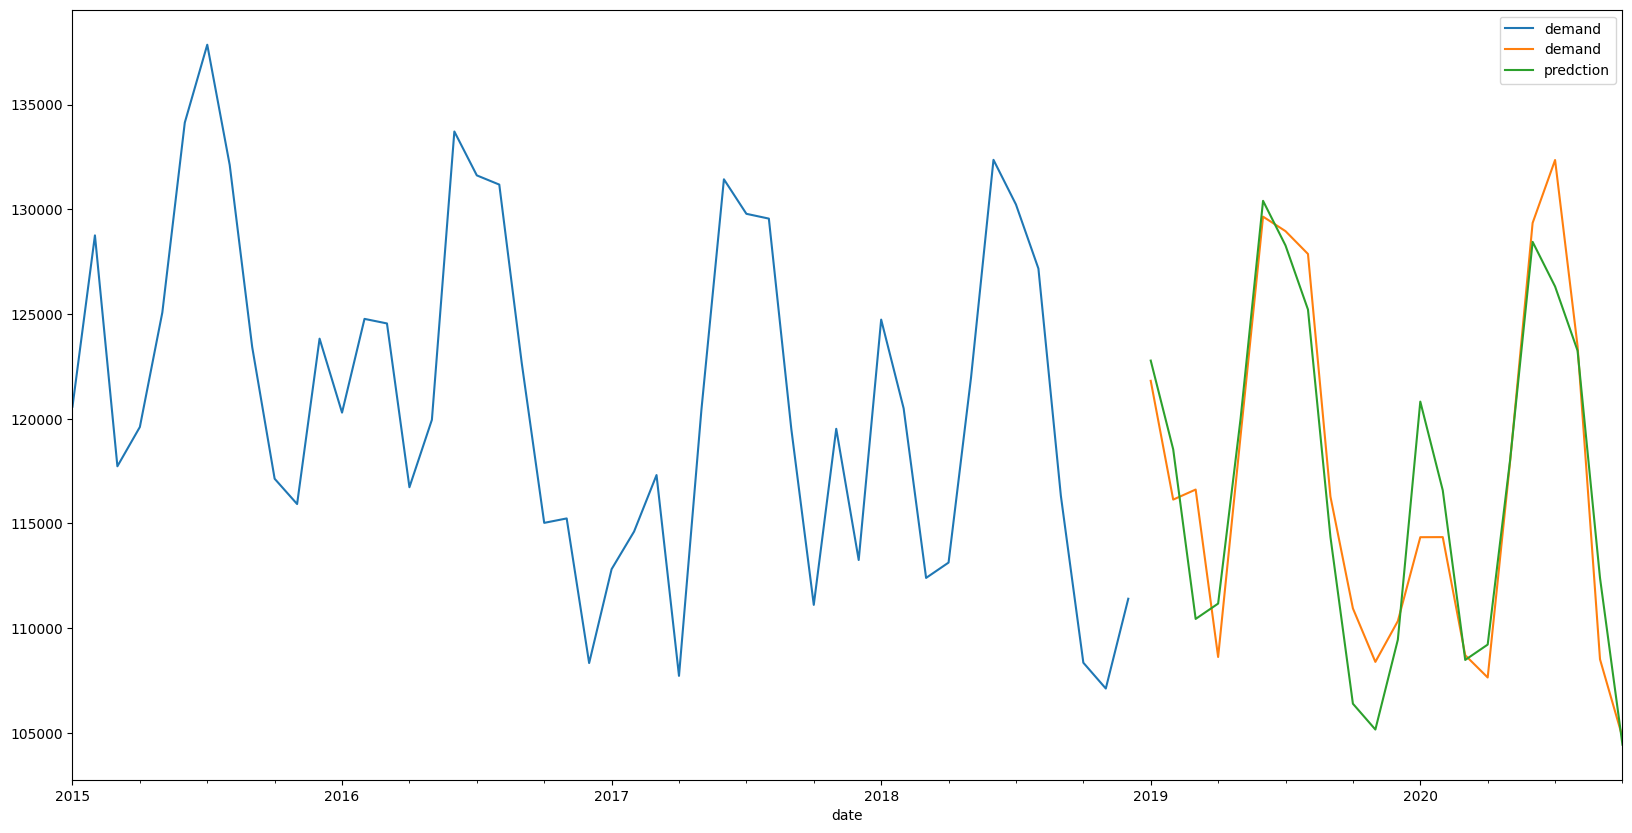

In [32]:
train.plot(figsize=(20,10), legend = True)
test.plot(figsize=(20,10), legend = True)
predictions.plot(legend = True, label = 'predction')

Text(0, 0.5, 'demand')

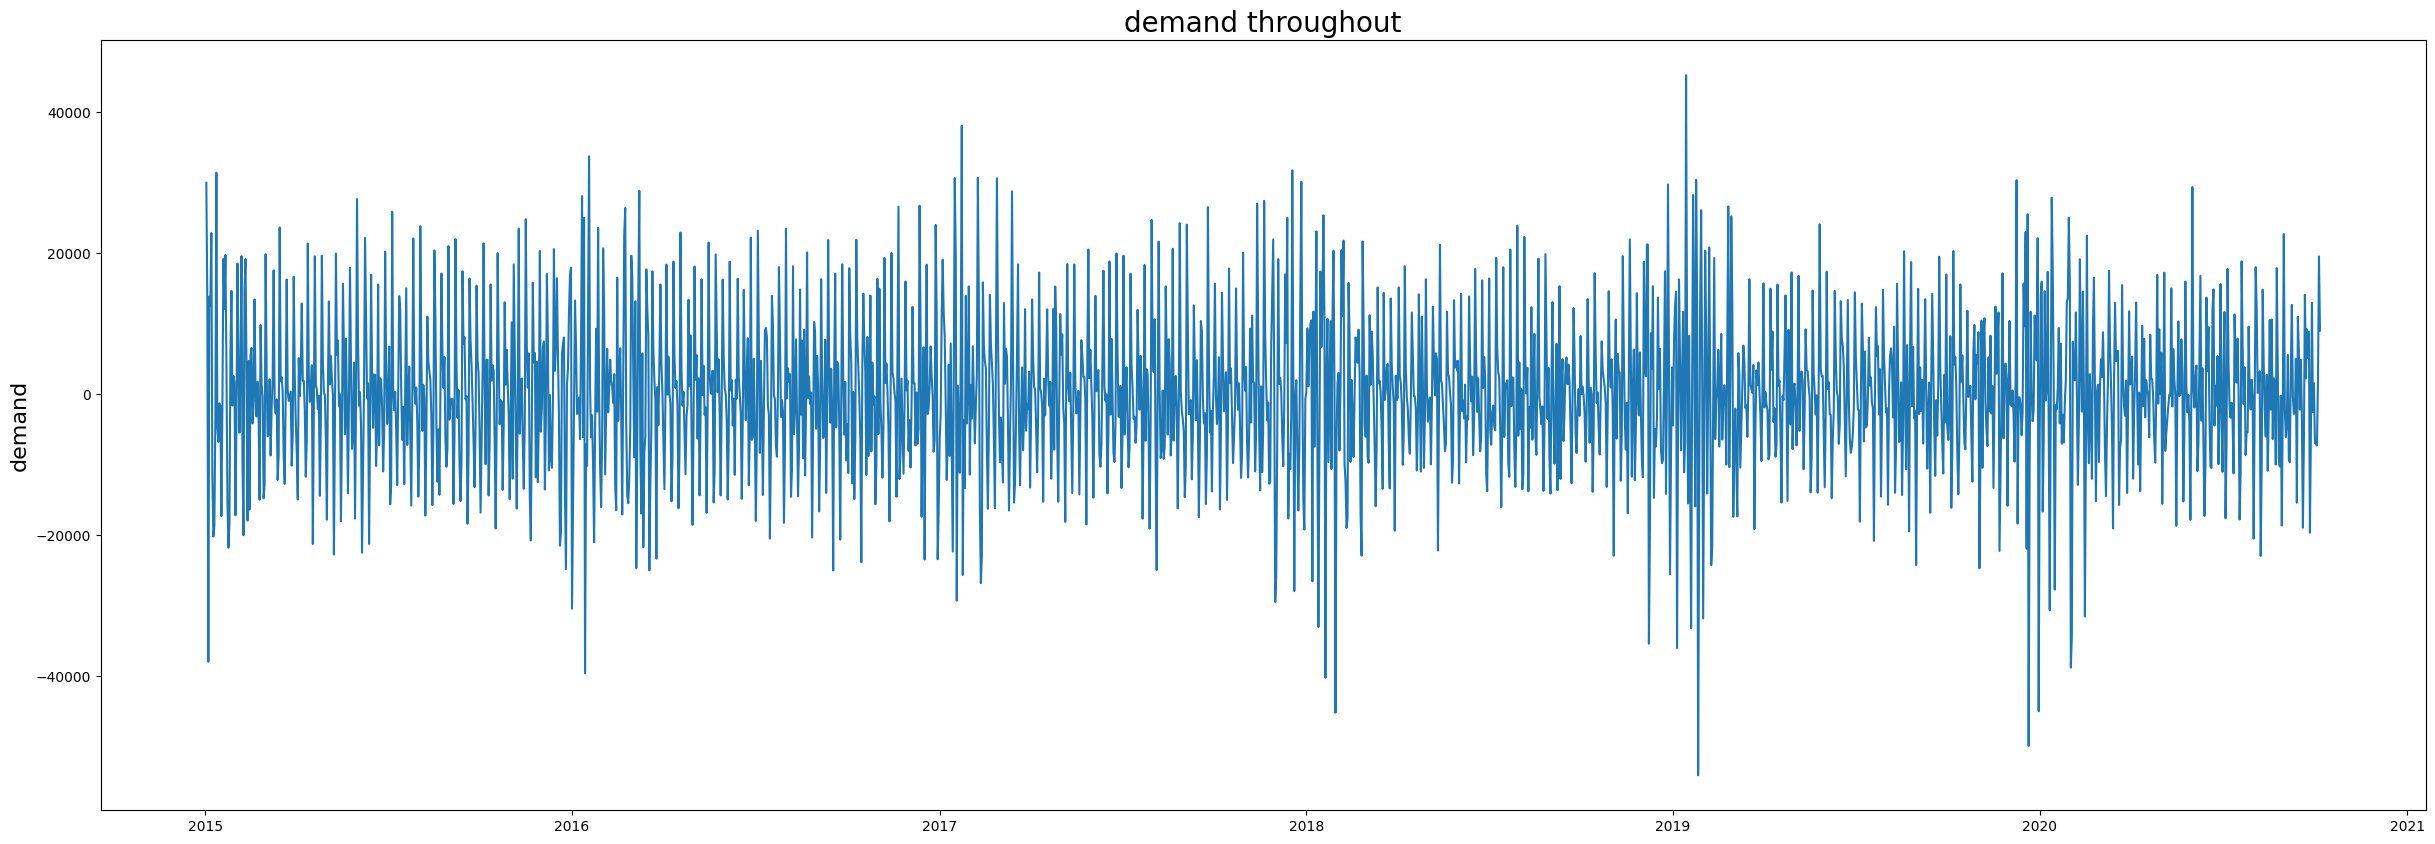

In [33]:
first_diff = df['demand'].diff()[1:]
plt.figure(figsize=(30,10))
plt.plot(first_diff)
plt.title('demand throughout', fontsize=20)
plt.ylabel('demand', fontsize=16)

ACF

[ 1.          0.06851388 -0.37427892 -0.17520923 -0.11106592 -0.21881923
  0.07621099  0.49166944  0.06155536 -0.23152074 -0.08219572 -0.08096109
 -0.21738747  0.07195055  0.46709857  0.06689513 -0.20840272 -0.09980835
 -0.09505323 -0.20029926  0.05682447  0.4787611   0.08323631 -0.20578437
 -0.11522668 -0.09206546 -0.2231981   0.06441868  0.48617632  0.0812172
 -0.22233069 -0.09565579 -0.08346485 -0.22804393]


<BarContainer object of 34 artists>

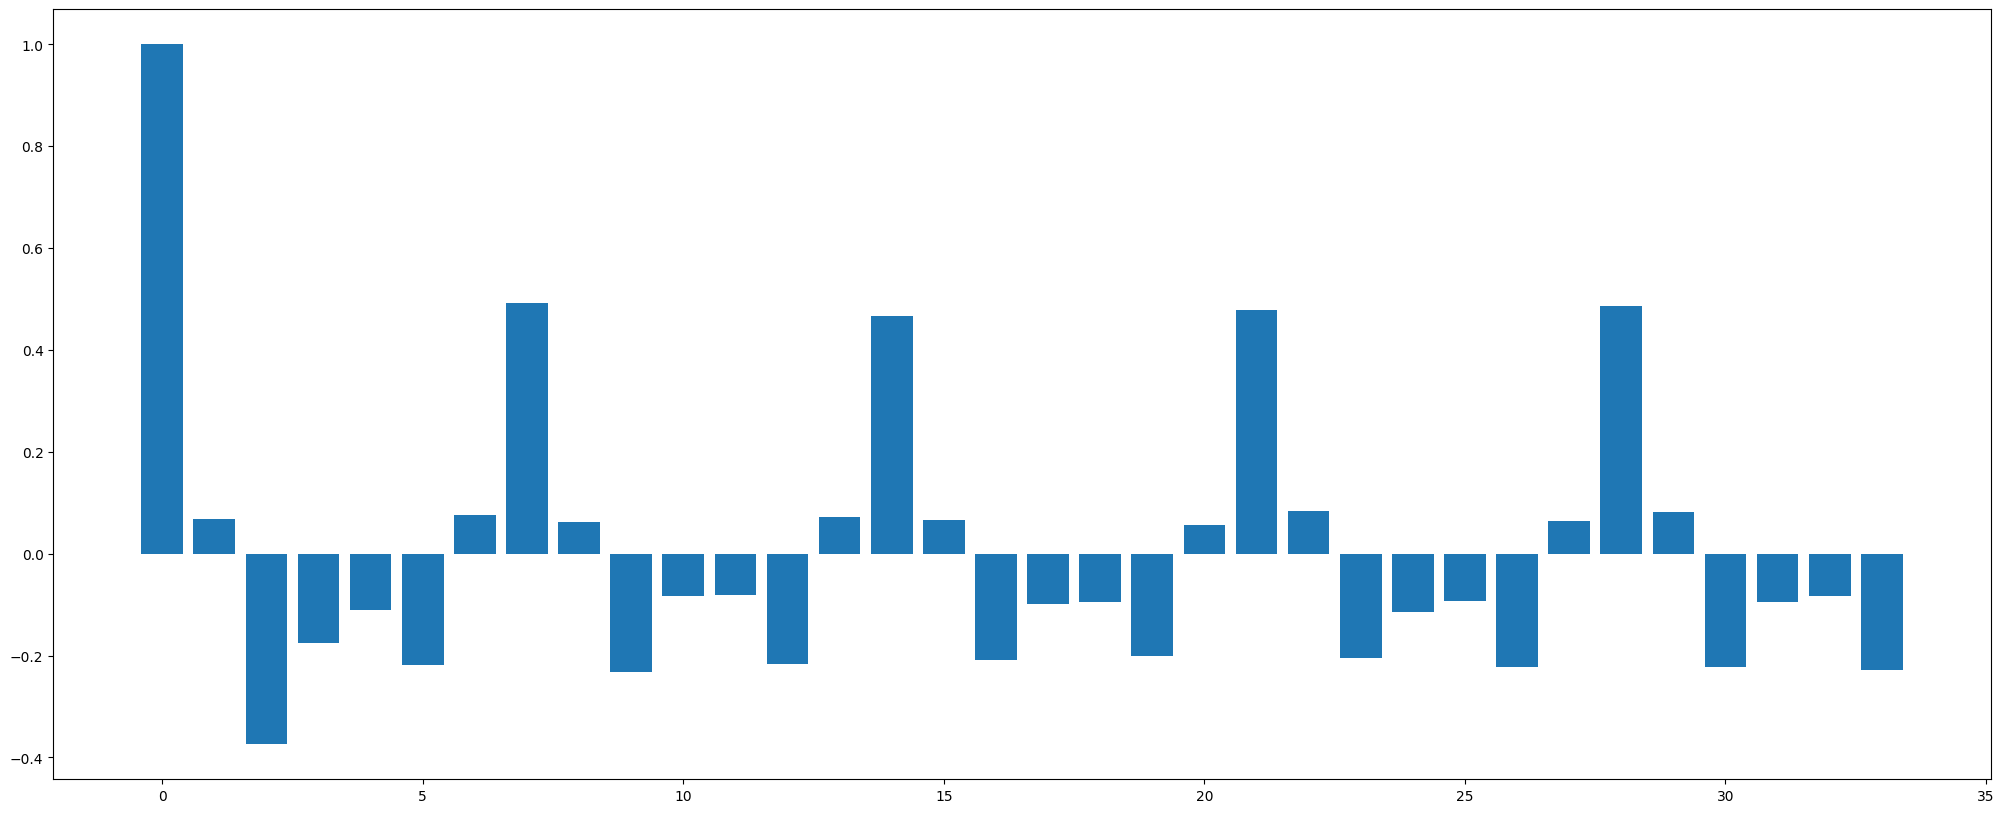

In [34]:
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(first_diff)
print(acf_vals)
num_lags = 34
plt.bar(range(num_lags), acf_vals[:num_lags])

PACF

<BarContainer object of 34 artists>

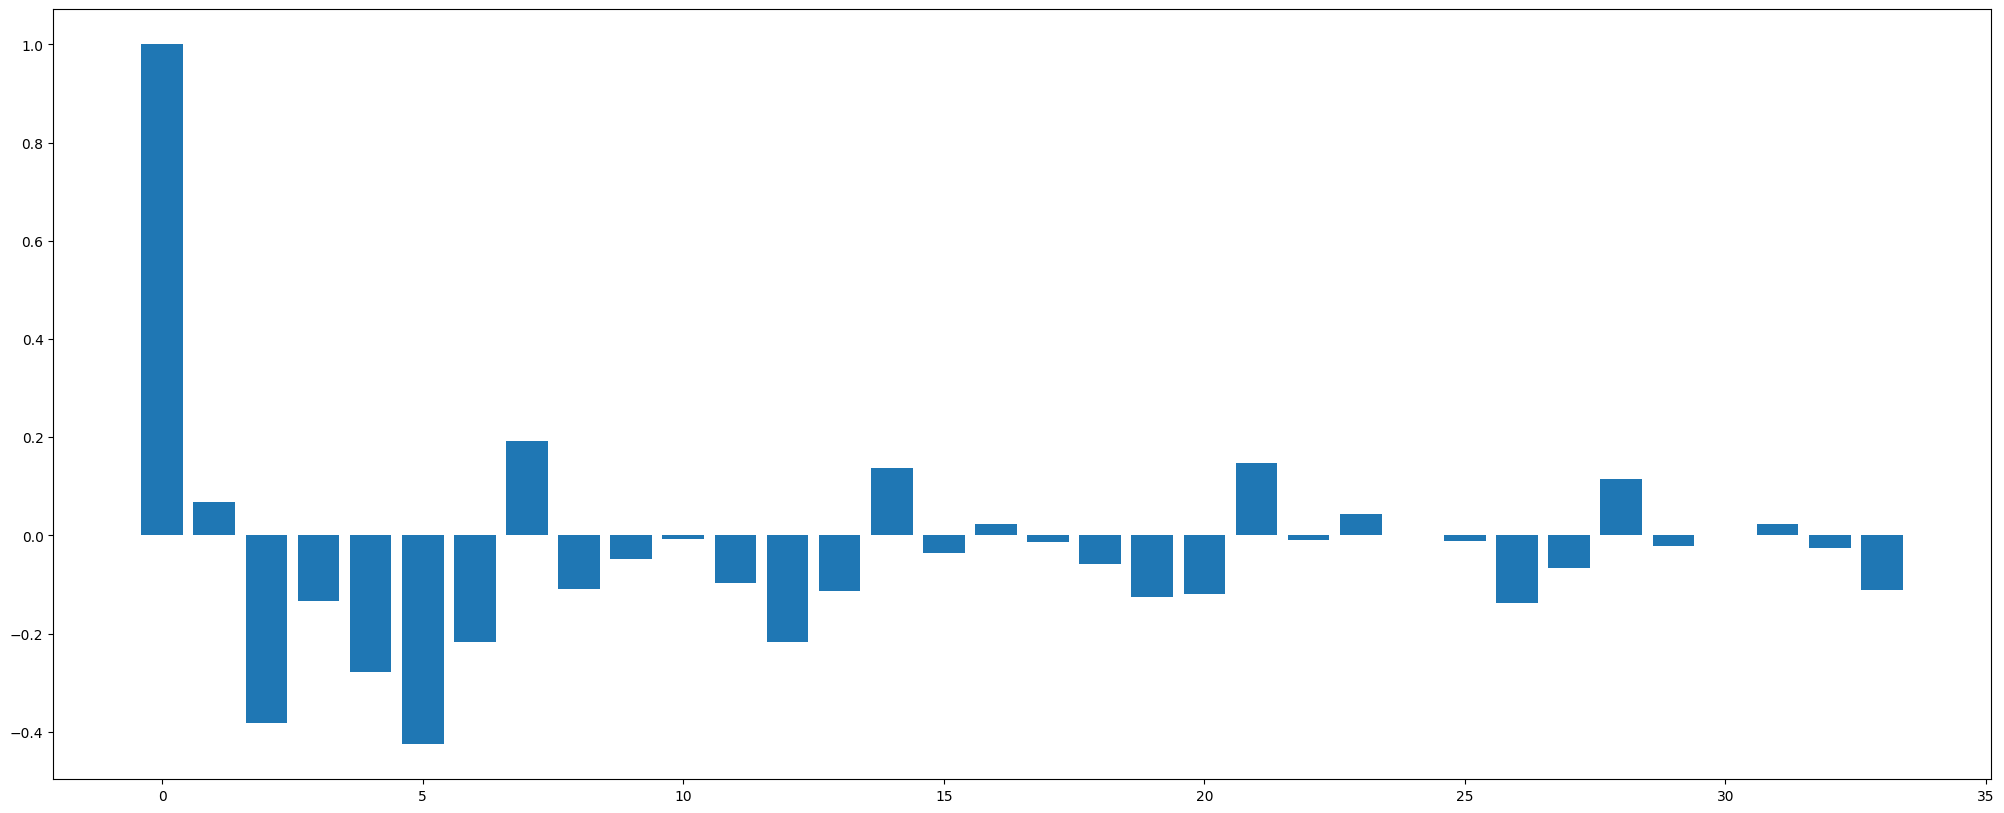

In [35]:
pacf_vals = pacf(first_diff)
num_lags = 34
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [36]:
order = (1,1,1)
seasonal_order = (1, 0, 1, 7)
model_sarima = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
model_fit = model_sarima.fit(low_memory=True)
model_fit.summary()

c:\Users\AB\ITS-Capstone\ITS-Capstone-11522-23-14\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            demand   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                1556.515
Date:                           Tue, 26 Sep 2023   AIC                          -3103.029
Time:                                   01:55:50   BIC                          -3076.599
Sample:                                        0   HQIC                         -3093.170
                                          - 1461                                         
Covariance Type:                          approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6076      0.026     23.146      0.000       0.556       0.659
ma.L1         -0.9353      0.011    -86.863      0.000      -0.956      -0.914
ar.S.L7        0.9999      0.000   5127.603      0.000       0.999       1.000
ma.S.L7       -0.9857      0.009   -105.041      0.000      -1.004      -0.967
sigma2         0.0068      0.000     26.656      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                  28.31   Jarque-Bera (JB):               677.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.16
Prob(H) (two-sided):                  0.80   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<Axes: >

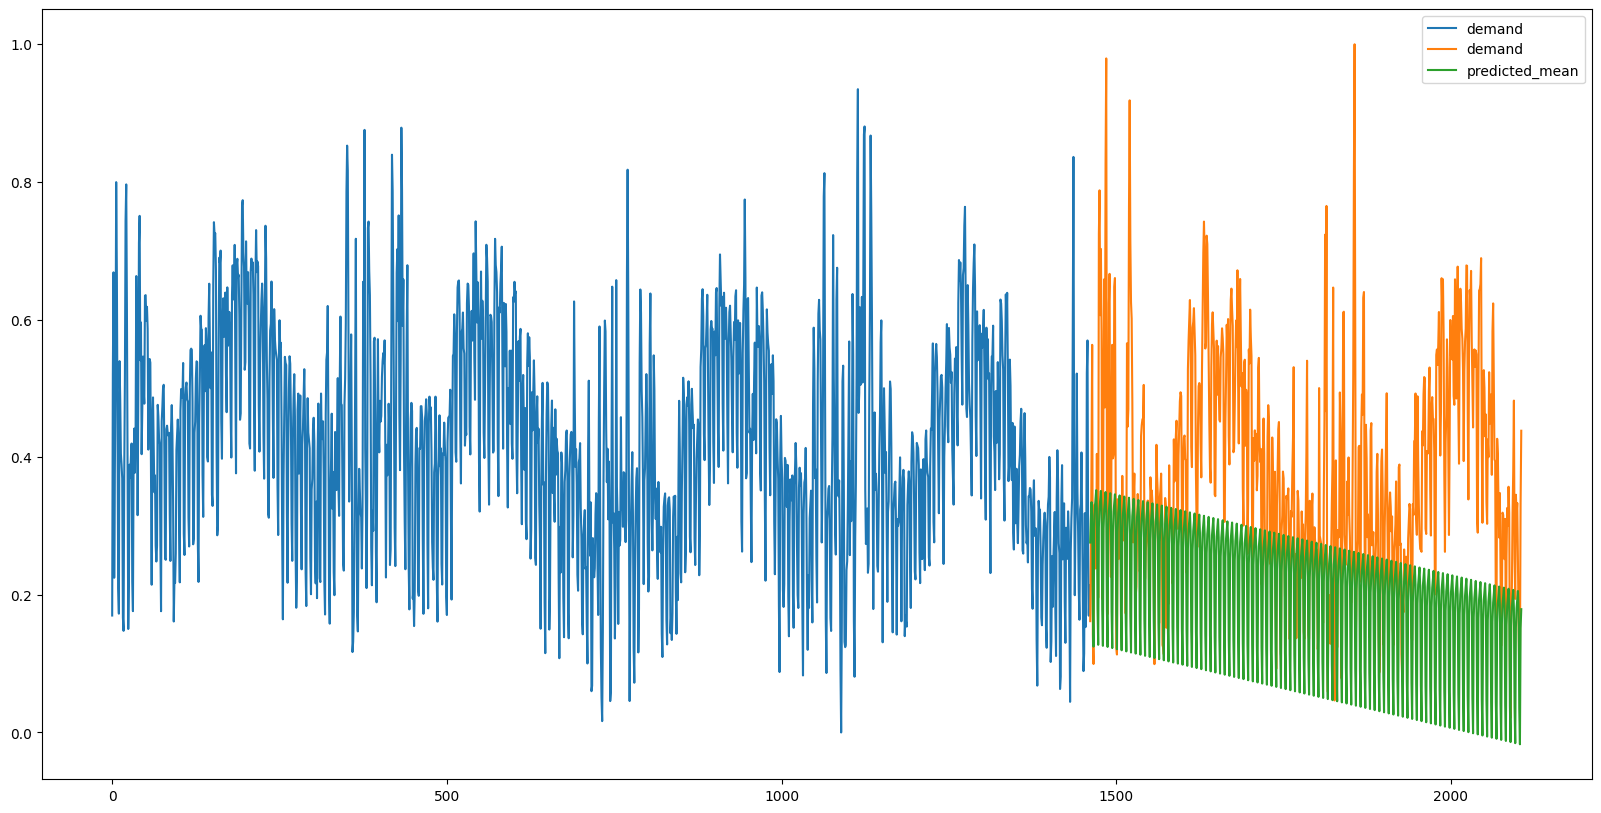

In [37]:
predictions = model_fit.forecast(len(y_test))
predictions = pd.Series(predictions, index=y_test.index)
y_train.plot(figsize=(20,10), legend = True)
y_test.plot(figsize=(20,10), legend = True)
predictions.plot(legend = True)